# Set Up The Environment and Loding The Library

In [ ]:
!pip install ultralytics -q

In [ ]:
from ultralytics import YOLO, solutions
from google.colab.patches import cv2_imshow

import torch
import cv2

# Load the YOLO Model


In [ ]:
model = YOLO('yolov8n.pt')

# Prepare the Video Capture

In [ ]:
cap = cv2.VideoCapture('/content/king ablauziz.mp4')
assert cap.isOpened(), 'Error reading video file'

# Get Video Information

In [ ]:
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH,cv2.CAP_PROP_FRAME_HEIGHT,cv2.CAP_PROP_FPS))
print('WIDTH:',{w},'\nHEIGTH:',{h},'\nFPS:',{fps})

WIDTH: {480} 
HEIGTH: {848} 
FPS: {59}


In [ ]:
video_writer = cv2.VideoWriter('object_counting_output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))

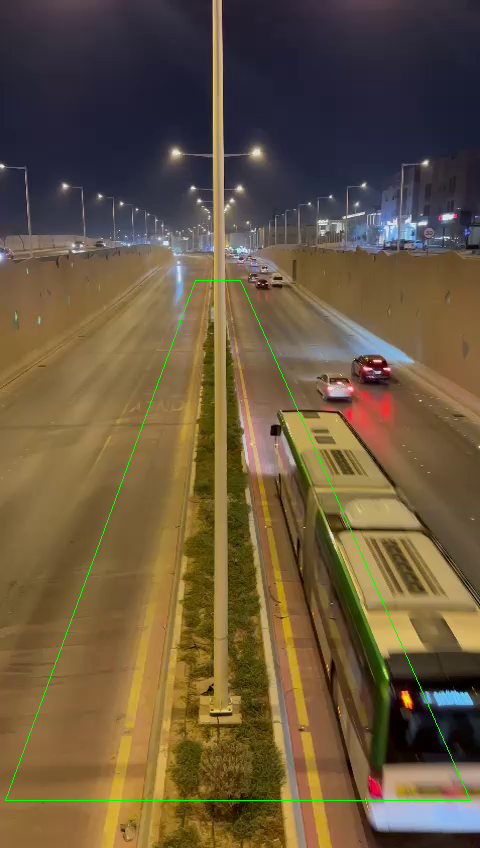

In [ ]:
import numpy as np
ret, frame = cap.read()
if ret:
  #the area we ant to detect in (road bus)
  pts = [(5,800) , (470, 800),(240,280) , (195, 280)]
  cv2.polylines(frame, [np.array(pts, np.int32)], isClosed=True, color=(0, 255, 0), thickness=1)




  cv2_imshow(frame)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

In [ ]:
model.names[7]

'truck'

In [ ]:
Rc1 = [(5,800) , (470, 800),(240,280) , (195, 280)]

truckc8 = [(395,370) , (35, 370)]

def counter(x):
  counter = solutions.ObjectCounter(
    view_img=True,
    reg_pts=x,
    names=model.names,
    draw_tracks=True,
    line_thickness=2,
)
  return counter




Rc1_counter = counter(Rc1)


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Polygon Counter Initiated.


'\nRc2_counter = counter(Rc2)\nRc3_counter = counter(Rc3)\nRc4_counter = counter(Rc4)\nRc5_counter = counter(Rc5)\nRc6_counter = counter(Rc6)\nRc7_counter = counter(Rc7)\nLc1_counter = counter(Lc1)\nLc2_counter = counter(Lc2)\nLc3_counter = counter(Lc3)\nLc4_counter = counter(Lc4)\nLc5_counter = counter(Lc5)\nLc6_counter = counter(Lc6)\nLc7_counter = counter(Lc7)\n#truk_counter = counter(truckc8)\n'

In [ ]:
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print('not working ')
        break

#tracking the car in bus road
    tracks = model.track(im0, persist=True, show=False)

    cv2.putText(im0, 'Mini Project', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    im0 = Rc1_counter.start_counting(im0, tracks)



    video_writer.write(im0)

Streaming output truncated to the last 5000 lines.
Speed: 5.6ms preprocess, 190.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 cars, 195.3ms
Speed: 6.0ms preprocess, 195.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 cars, 187.2ms
Speed: 5.6ms preprocess, 187.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 cars, 179.0ms
Speed: 5.7ms preprocess, 179.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 cars, 175.9ms
Speed: 5.4ms preprocess, 175.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 cars, 197.7ms
Speed: 6.0ms preprocess, 197.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 cars, 168.6ms
Speed: 6.0ms preprocess, 168.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 cars, 171.2ms
Speed: 5.3ms preprocess, 171.2ms inference, 1.2ms postprocess per i

In [ ]:
cap.release()
video_writer.release()
cv2.destroyAllWindows()